In [1]:
# %pip install opencv-python
# %pip install tensorflow
# %pip install opencv-contrib-python

In [2]:
import os
import sys

import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# from google.colab import files

2022-11-07 15:19:00.933213: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 15:19:01.125453: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/green-machine/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-11-07 15:19:01.125475: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-07 15:19:01.157651: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has

In [3]:
%matplotlib inline

In [4]:
im = cv2.imread("../data/hight-st-image.jpg")

In [5]:
new_height = 200
new_width = new_height * im.shape[1] // im.shape[0]

In [6]:
im = cv2.resize(im, (new_width, new_height))

In [7]:
cv2.setUseOptimized(True)
cv2.setNumThreads(8)

In [8]:
sss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

sss.setBaseImage(im)

sss.switchToSelectiveSearchQuality()

rects = sss.process()

In [9]:
rects.shape

(5422, 4)

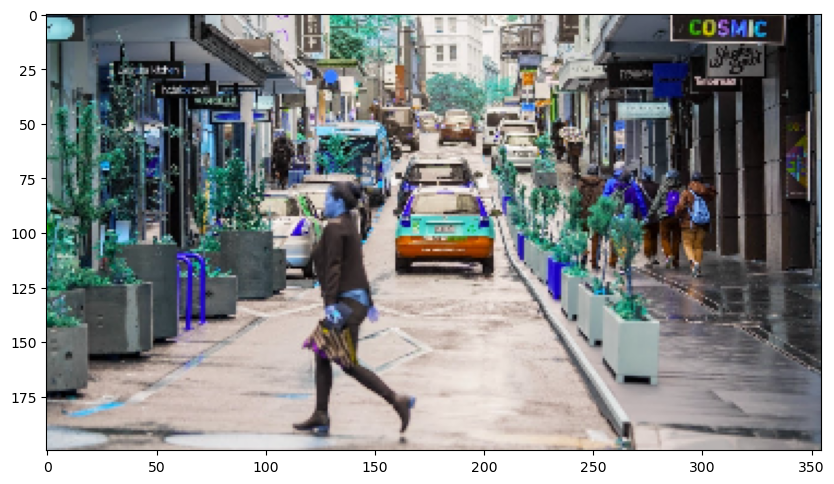

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()

In [11]:
num_show_rects = 15

im_out = im.copy()

for _, rect in enumerate(rects):
    if _ < num_show_rects:
        x, y, w, h = rect
        cv2.rectangle(im_out, (x, y, x + w, y + h), (0, 255, 0), 1, cv2.LINE_AA)
    else:
        break

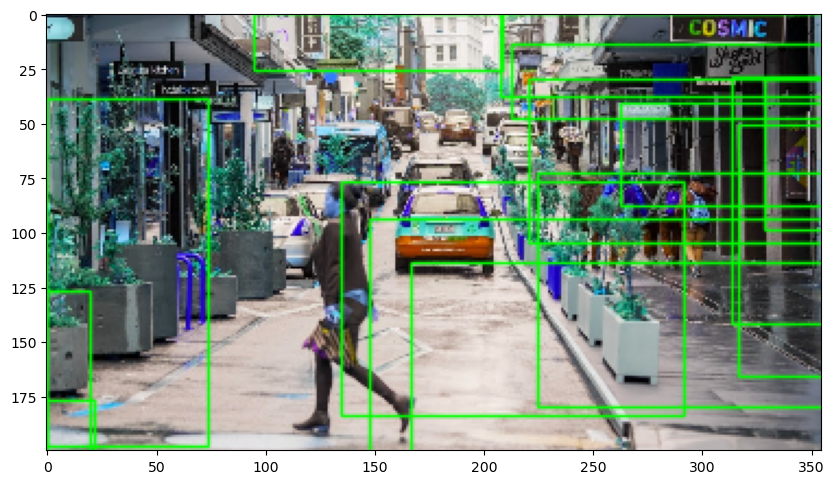

In [12]:
plt.figure(figsize=(10, 10))
plt.imshow(im_out)
plt.show()

In [13]:
%pip install face-recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:01:01
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [7 lines of output]
      running bdist_wheel
      running build
      running build_py
      running build_ext
      
      ERROR: CMake must be installed to build dlib
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for dlib
  Running setup.py clean for dlib
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=d7434a344d942d42d5d46e8099244d566afc562b2b7541042c1471c5b3ed28c2
  Stored in directory: /home/green-machin